<center>
    
# Tecnológico de Costa Rica
## Curso de Procesamiento de Lenguaje Natural con ML
### Profesores: María Auxiliadora Mora Cross y José Enrique Araya Monge
#### Estudiante: José Alberto Raygada Agüero
##### Proyecto de predicción de la tendencia en el precio de acciones basado en análisis de sentimiento

</center>

___

### ***I. Definición del problema***

La predicción de las variaciones en el precio de las acciones que cotizan en un mercado desarrollado, como por ejemplo en el Stock Exchange de New York (NYSE), es de mucho interés para los inversionistas de este tipo de instrumentos financieros, pues sus decisiones de compra y venta dependen en gran medida de la expectativa sobre dicho comportamiento. El problema es que dicho comportamiento en el precio de las acciones es muy difícil de predecir, inclusive cuando se utilizan las diferentes herramientas tradicionales que existen de análisis fundamental y de análisis técnico.

### ***II.	Justificación***

Ante esa problemática, sería de gran utilidad contar con un modelo de NLP de análisis de sentimiento, para intentar predecir el comportamiento del precio de acciones de la Bolsa de Nueva York (New York Stock Exchange), basándose en la utilización del modelo de lenguaje pre-entrenado en corpus de información financiera y evaluando una base de datos de noticias financieras para una compañía seleccionada en contraste con la información de la serie de tiempo del precio de su acción en dicho mercado. 

### ***III.	Objetivo***

La idea del modelo de predicción sería entrenarlo con la información del cambio (aumento, disminución o sin variación) en los valores diarios históricos del precio de la acción de una empresa en particular (p.e. Tesla), al cierre del día (estos valores constituyen el target del modelo), con los valores de probabilidad de la clasificación (positivo, negativo o neutro) derivada del análisis de sentimiento de un corpus de noticias (los encabezados) relacionados con dicha empresa (estos últimos serían los features del modelo), en ambos casos para el año 2020.


### ***IV.	Antecedentes***

Actualmente se cuenta con una librería denominada FinBert, que es un modelo pre-entrenado de NLP basado en BERT (Bidireccional Encoder Representation from Transformers), el revolucionario modelo de Transformers de Google, que puede ser utilizado para realizar análisis de sentimiento en el ámbito financiero y además se cuenta con la posibilidad de acceder a información histórica del comportamiento de precios de acciones que cotizan en mercados financieros desarrollados (como el NYSE), así como una serie de investigaciones sobre la utilización de esos recursos para la predicción de los movimientos bursátiles utilizando las herramientas de Ciencia de Datos. A continuación se citan cuatro artículos relacionados con el tema de Sentiment Analysis y la predicción de tendencias en los precios de acciones, sobre los cuales basaré mi proyecto:

1)	Tan Araci, Dogu (2019). FinBert: Financial Sentiment Analysis with Pre-trained Language Models. University of Amsterdam, (1-10). https://arxiv.org/pdf/1908.10063.pdf

2)	Allen H. Huanga, Hui Wangb, Yi Yang (2022). FinBERT—A Large Language Model for Extracting Information from Financial Text, (1-64). https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3910214

3)	Sk. Mubeena, M. Anil Kumar, U. Ramya, P. Sujatha (2020). Forecasting Stock Market Movement Direction Using Sentiment Analysis And Support Vector Machine. https://www.irjet.net/archives/V7/i3/IRJET-V7I3145.pdf

4)	Kalyani Joshi , Prof. Bharathi H. N., Prof. Jyothi Rao (2016). Stock Trend Prediction Using News Sentiment Analysis. https://arxiv.org/pdf/1607.01958.


### ***V.	Marco teórico***

Análisis de sentimiento:
El análisis de sentimientos es una tarea muy común en PNL que tiene como objetivo asignar un "sentimiento" o una "emoción" al texto. Por lo general, predice si el sentimiento es positivo, negativo o neutral.

El análisis de sentimiento es de mucho interés en el área financiera, ya que los cambios en el sentimiento en torno a una empresa podrían ayudar a predecir un aumento o una caída en las acciones de esa empresa.

BERT o Representación de Codificador Bidireccional de Transformadores es una técnica basada en redes neuronales para el pre-entrenamiento del procesamiento del lenguaje natural desarrollada por Google.

Si bien BERT ha demostrado ser muy potente y efectivo en los últimos años y es actualmente muy utilizado, es un modelo que aplica lenguaje general. Las noticias financieras y los informes bursátiles, por su parte, a menudo involucran una gran cantidad de jerga específica del dominio, por lo que un modelo como BERT no puede generalizar bien en este dominio.

Debido a lo anterior es que surgió la derivación de [FinBert](https://github.com/ProsusAI/finBERT), el cual fue entrenado por especialistas en el ámbito financiero, a los que se pidió que asignaran etiquetas de acuerdo con la forma en que creían que la información de la oración podría afectar el precio de las acciones de una empresa seleccionada.

En otras palabras, el sentimiento aquí es más o menos un indicador de cómo las personas sintieron que ciertas noticias e información afectarían el precio de una empresa. El sentimiento negativo llevaría a que una acción perdiera valor, mientras que el sentimiento positivo, por supuesto, daría lugar a un incremento en el valor de la acción.

Los algoritmos de clasificación que se evaluarán para el modelo de predicción serían de tipo de clasificación, específicamente Support Vector Machine (SVM), Multiple Layer Perceptron, Random Forest y Naïve Bayes.


### ***VI.	Bases de datos a utilizar***

Las bases de datos a utilizar para obtener la información histórica del precio de acciones y de encabezados de noticias financieras son las siguientes:

1. ***Daily Financial News for 6000+ Stocks*** (para entrenamiento)

Base de datos de [Kaggle](https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests?select=raw_analyst_ratings.csv) con más de 6000 noticias del mercado de valores, desde el año 2009 al 2020.

2.	***Información sobre precios de acciones***:

Para obtener los datos históricos de series de tiempo correspondientes a precios de acciones se utilizará la API de Yahoo! Finance , que es un servicio de Yahoo! que proporciona información financiera y comentarios con un enfoque en los mercados de los Estados Unidos, incluyendo cotizaciones de bolsa, índices bursátiles, comunicados de prensa corporativos y financieros, y Foros de discusión para discutir las perspectivas de empresas y la valoración de las mismas. La librería específica para acceder a dicha información será yfinance (https://pypi.org/project/yfinance/).

#### Esquema general del proyecto

In [461]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Sentiment_analysis_stock_prediction.png", width=1000, height=600)

#### ***Habilitación del GPU***

Dado que se va a entrenar una red neuronal pesada, se procede a habiitar el GPU que Google Colab ofrece de forma gratuita, la cual se agrega usando el menú:

Runtime -> Change runtime type -> Hardware accelerator: GPU

Luego se puede verificar si el dispositivo está disponible.

In [1]:
# Biblioteca de PyTorch
"""
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'Hay {torch.cuda.device_count()} GPU(s) disponible.')
    print('Device:', torch.cuda.get_device_name(0))

else:
    print('No GUP disponible.')
    device = torch.device("cpu")
    
"""

'\nimport torch\n\nif torch.cuda.is_available():       \n    device = torch.device("cuda")\n    print(f\'Hay {torch.cuda.device_count()} GPU(s) disponible.\')\n    print(\'Device:\', torch.cuda.get_device_name(0))\n\nelse:\n    print(\'No GUP disponible.\')\n    device = torch.device("cpu")\n    \n'

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#### Importar la base de datos de noticias históricas de Tesla

In [3]:
#from google.colab import files
#files.upload()

In [6]:
# Importar la base de datos histórica de noticias de Tesla

df_news_hist = pd.read_csv('headlines_news_Amazon.csv')
df_news_hist.head(5)

,headline,url,publisher,date
0,"Amazon's Traffic, Mindshare Could Be A 'Huge' ...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,12/4/2017 0:00
1,Northcoast Out With Note Saying They Are Seein...,https://www.benzinga.com/analyst-ratings/analy...,Eddie Staley,12/1/2017 0:00
2,Mid-Morning Market Update: Markets Open Lower;...,https://www.benzinga.com/news/17/07/9840297/mi...,Lisa Levin,7/28/2017 0:00
3,"Sonos Shares Spike To Session High, Now Up 9.5...",https://www.benzinga.com/m-a/20/06/16213381/so...,Benzinga Newsdesk,2020-06-09 11:11:34-04:00
4,"Amazon, Apple, Walmart, Other Retailers Shutte...",https://www.benzinga.com/news/20/06/16146370/a...,Neer Varshney,5/31/2020 0:00


In [7]:
# Obtener únicamente la columna del headline y de la fecha

df_news_hist = df_news_hist[['date','headline']]
df_news_hist

,date,headline
0,12/4/2017 0:00,"Amazon's Traffic, Mindshare Could Be A 'Huge' ..."
1,12/1/2017 0:00,Northcoast Out With Note Saying They Are Seein...
2,7/28/2017 0:00,Mid-Morning Market Update: Markets Open Lower;...
3,2020-06-09 11:11:34-04:00,"Sonos Shares Spike To Session High, Now Up 9.5..."
4,5/31/2020 0:00,"Amazon, Apple, Walmart, Other Retailers Shutte..."
...,...,...
714,12/7/2017 0:00,Oppenheimer Says Premier Stock Is Under Pressu...
715,4/5/2017 0:00,Plug Power Wins $70M Contract with Amazon
716,9/12/2017 0:00,Starboard Value's Jeff Smith At CNBC's 'Delive...
717,11/14/2013 0:00,UPDATE: Jefferies' Fitzgerald Sees Possible De...


In [8]:
df_news_hist.describe()

,date,headline
count,719,719
unique,484,719
top,5/1/2020 0:00,"Amazon's Traffic, Mindshare Could Be A 'Huge' ..."
freq,23,1


In [9]:
# Shuffle
"""
df_news_hist = df_news_hist.sample(frac = 1)
df_news_hist.head(5)
"""

'\ndf_news_hist = df_news_hist.sample(frac = 1)\ndf_news_hist.head(5)\n'

In [10]:
# Depuración de fechas

df_news_hist['long_date'] = pd.to_datetime(df_news_hist['date'], utc = True)
df_news_hist['Date'] = df_news_hist['long_date'].dt.strftime('%Y-%m-%d')
df_news_hist = df_news_hist[['Date','headline']]
df_news_hist.head(5)


,Date,headline
0,2017-12-04,"Amazon's Traffic, Mindshare Could Be A 'Huge' ..."
1,2017-12-01,Northcoast Out With Note Saying They Are Seein...
2,2017-07-28,Mid-Morning Market Update: Markets Open Lower;...
3,2020-06-09,"Sonos Shares Spike To Session High, Now Up 9.5..."
4,2020-05-31,"Amazon, Apple, Walmart, Other Retailers Shutte..."



#### Tokenización de los headlines

In [11]:
headlines_array = np.array(df_news_hist)

headlines_array[:1]

array([['2017-12-04',
        "Amazon's Traffic, Mindshare Could Be A 'Huge' Opportunity For Aaron's"]],
      dtype=object)

In [12]:
#np.random.shuffle(headlines_array)

#headlines_array[:1]

In [13]:
headlines_list = list(headlines_array[:,1])

headlines_list[:10]

["Amazon's Traffic, Mindshare Could Be A 'Huge' Opportunity For Aaron's",
 "Northcoast Out With Note Saying They Are Seeing 'Signs' That Aaron's Progressive Segment Is Working Diligently To Put Together A Go-To-Market Strategy That Would Allow It To Leverage Amazon's Traffic And Mindsahre",
 'Mid-Morning Market Update: Markets Open Lower; Amazon Profit Misses Expectations',
 "Sonos Shares Spike To Session High, Now Up 9.5%, As Citron's Andrew Left, Currently Interviewing On FOX Business, Said Co. Could Be Acquired By Apple Or Amazon",
 'Amazon, Apple, Walmart, Other Retailers Shutter Stores, Scale Back Operations In Areas Worst Hit With Protests',
 "'FAANG Stocks Are Strong Once Again,' Facebook, Amazon, Netflix Hit Record Highs Last Week",
 "Retail Pro Says Giants Like Amazon, Walmart Will Prevail After Coronavirus: 'It's Not Fair'",
 'Amazon, Exxon Mobil Earnings Weigh On Market To Start New Month As Caution Steers The Wheel',
 'Disappointment From Amazon, Apple Weighs On Market As I

In [14]:
#pip install transformers

In [15]:
# Importar las librerías requeridas

import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [16]:
# Se obtiene el tokenizador con el modelo "ProsusAI/finbert"

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

In [17]:
tokenizer

PreTrainedTokenizerFast(name_or_path='ProsusAI/finbert', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [18]:
#  Se instancia el modelo de finbert

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [19]:
# Establecer el lugar en donde los encabezados son tokenizados para ser imputados en el modelo

inputs = tokenizer(headlines_list, padding = True, truncation = True, return_tensors='pt')

print(inputs)# Establecer el lugar en donde los encabezados son tokenizados para ser imputados en el modelo


{'input_ids': tensor([[  101,  9733,  1005,  ...,     0,     0,     0],
        [  101,  2167,  3597,  ...,     0,     0,     0],
        [  101,  3054,  1011,  ...,     0,     0,     0],
        ...,
        [  101, 25211,  3643,  ...,     0,     0,     0],
        [  101, 10651,  1024,  ...,     0,     0,     0],
        [  101, 24209,  2389,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [20]:
# Inferencia

outputs = model(**inputs)

print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.2147, -2.5029,  1.2036],
        [ 1.9585, -2.4133, -0.8495],
        [-1.2151,  2.8018, -1.4850],
        ...,
        [ 1.8513, -2.8320,  0.5366],
        [ 1.6609, -2.8216,  0.3194],
        [ 1.5494, -2.9128,  1.0485]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [21]:
# Postprocesamiento con softmax

import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.4967, 0.0121, 0.4912],
        [0.9320, 0.0118, 0.0562],
        [0.0175, 0.9692, 0.0133],
        ...,
        [0.7826, 0.0072, 0.2102],
        [0.7857, 0.0089, 0.2054],
        [0.6182, 0.0071, 0.3746]], grad_fn=<SoftmaxBackward0>)


In [22]:
# Clases del modelo

model.config.id2label

{0: 'positive', 1: 'negative', 2: 'neutral'}

In [23]:
# Formateo de los resultados como un data frame

# Headline #Positive #Negativa #Neutral
positive = predictions[:,0].tolist()
negative = predictions[:,1].tolist()
neutral = predictions[:,2].tolist()

table = {'Headline': headlines_list,
         'Positive': positive,
         'Negative': negative,
         'Neutral': neutral}

columnsNames = ['Headline', 'Positive', 'Negative', 'Neutral']
df = pd.DataFrame(table, columns = columnsNames)

df.head(5)


,Headline,Positive,Negative,Neutral
0,"Amazon's Traffic, Mindshare Could Be A 'Huge' ...",0.496704,0.012067,0.491229
1,Northcoast Out With Note Saying They Are Seein...,0.932004,0.011770,0.056225
2,Mid-Morning Market Update: Markets Open Lower;...,0.017454,0.969220,0.013326
3,"Sonos Shares Spike To Session High, Now Up 9.5...",0.931655,0.020641,0.047704
4,"Amazon, Apple, Walmart, Other Retailers Shutte...",0.007593,0.951818,0.040589


In [24]:
# Incorporar al nuevo data frame la información de las fechas

df['Date'] = df_news_hist['Date']
df

,Headline,Positive,Negative,Neutral,Date
0,"Amazon's Traffic, Mindshare Could Be A 'Huge' ...",0.496704,0.012067,0.491229,2017-12-04
1,Northcoast Out With Note Saying They Are Seein...,0.932004,0.011770,0.056225,2017-12-01
2,Mid-Morning Market Update: Markets Open Lower;...,0.017454,0.969220,0.013326,2017-07-28
3,"Sonos Shares Spike To Session High, Now Up 9.5...",0.931655,0.020641,0.047704,2020-06-09
4,"Amazon, Apple, Walmart, Other Retailers Shutte...",0.007593,0.951818,0.040589,2020-05-31
...,...,...,...,...,...
714,Oppenheimer Says Premier Stock Is Under Pressu...,0.038456,0.944176,0.017368,2017-12-07
715,Plug Power Wins $70M Contract with Amazon,0.889979,0.011142,0.098879,2017-04-05
716,Starboard Value's Jeff Smith At CNBC's 'Delive...,0.782587,0.007238,0.210175,2017-09-12
717,UPDATE: Jefferies' Fitzgerald Sees Possible De...,0.785695,0.008883,0.205422,2013-11-14


In [25]:
df.to_csv('stock_sense.csv')

In [109]:
print(max(df['Date']))

2020-06-11


### Generación de la base de datos de precios de acciones

In [396]:
import yfinance as yf

nemo = yf.Ticker("AMZN")

# get historical market data
stockdf = nemo.history(period="max")
stockdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0
...,...,...,...,...,...,...,...
2022-10-19,114.709999,116.589996,113.220001,115.070000,47198100,0,0.0
2022-10-20,113.830002,118.239998,113.510002,115.250000,48795100,0,0.0
2022-10-21,114.790001,119.589996,114.500000,119.320000,55611900,0,0.0


In [397]:
stockdf.reset_index('Date', drop=False, inplace=True)
stockdf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0
...,...,...,...,...,...,...,...,...
6400,2022-10-19,114.709999,116.589996,113.220001,115.070000,47198100,0,0.0
6401,2022-10-20,113.830002,118.239998,113.510002,115.250000,48795100,0,0.0
6402,2022-10-21,114.790001,119.589996,114.500000,119.320000,55611900,0,0.0
6403,2022-10-24,119.980003,120.389999,116.570000,119.820000,49531500,0,0.0


In [398]:
"""
# Seleccionar los datos para el período de interés

start_date = '2010-01-01'
end_date = '2020-12-31'
mask = (stockdf['Date'] > start_date) & (stockdf['Date'] <= end_date)
stockdf = stockdf.loc[mask]
stockdf
"""

"\n# Seleccionar los datos para el período de interés\n\nstart_date = '2010-01-01'\nend_date = '2020-12-31'\nmask = (stockdf['Date'] > start_date) & (stockdf['Date'] <= end_date)\nstockdf = stockdf.loc[mask]\nstockdf\n"

In [399]:
# Se selecciona únicamente la información del precio de cierre

stockdf = stockdf[['Date','Close']]
stockdf

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6400,2022-10-19,115.070000
6401,2022-10-20,115.250000
6402,2022-10-21,119.320000
6403,2022-10-24,119.820000


In [400]:
# Inclusión de una columna con el precio en t-1 para comparar el cambio en precio

stockdf['t-1'] = stockdf['Close'].shift(2)
stockdf

,Date,Close,t-1
0,1997-05-15,0.097917,NaN
1,1997-05-16,0.086458,NaN
2,1997-05-19,0.085417,0.097917
3,1997-05-20,0.081771,0.086458
4,1997-05-21,0.071354,0.085417
...,...,...,...
6400,2022-10-19,115.070000,113.790001
6401,2022-10-20,115.250000,116.360001
6402,2022-10-21,119.320000,115.070000
6403,2022-10-24,119.820000,115.250000


In [401]:
# Sustituir el primer valor NaN de t-1 por una base 1

stockdf = stockdf.fillna(1)
stockdf = stockdf[['Date','t-1','Close']]
stockdf

,Date,t-1,Close
0,1997-05-15,1.000000,0.097917
1,1997-05-16,1.000000,0.086458
2,1997-05-19,0.097917,0.085417
3,1997-05-20,0.086458,0.081771
4,1997-05-21,0.085417,0.071354
...,...,...,...
6400,2022-10-19,113.790001,115.070000
6401,2022-10-20,116.360001,115.250000
6402,2022-10-21,115.070000,119.320000
6403,2022-10-24,115.250000,119.820000


In [402]:
# Cálculo de la variación de precio de cierre versus precio anterior

stockdf['variation'] = (stockdf['Close']-stockdf['t-1'])
#stockdf.to_csv('target.csv')
stockdf

,Date,t-1,Close,variation
0,1997-05-15,1.000000,0.097917,-0.902083
1,1997-05-16,1.000000,0.086458,-0.913542
2,1997-05-19,0.097917,0.085417,-0.012500
3,1997-05-20,0.086458,0.081771,-0.004687
4,1997-05-21,0.085417,0.071354,-0.014063
...,...,...,...,...
6400,2022-10-19,113.790001,115.070000,1.279999
6401,2022-10-20,116.360001,115.250000,-1.110001
6402,2022-10-21,115.070000,119.320000,4.250000
6403,2022-10-24,115.250000,119.820000,4.570000


In [403]:
# Crear la columna de target con 0 si el precio bajó o 1 si el precio subió

stockdf['target'] = 1.0

x = 0.0
for x in range(len(stockdf)):
    if stockdf.variation[x] >= 0:
        stockdf.target[x] = 1
    else:
        stockdf.target[x] = 0

stockdf

,Date,t-1,Close,variation,target
0,1997-05-15,1.000000,0.097917,-0.902083,0.0
1,1997-05-16,1.000000,0.086458,-0.913542,0.0
2,1997-05-19,0.097917,0.085417,-0.012500,0.0
3,1997-05-20,0.086458,0.081771,-0.004687,0.0
4,1997-05-21,0.085417,0.071354,-0.014063,0.0
...,...,...,...,...,...
6400,2022-10-19,113.790001,115.070000,1.279999,1.0
6401,2022-10-20,116.360001,115.250000,-1.110001,0.0
6402,2022-10-21,115.070000,119.320000,4.250000,1.0
6403,2022-10-24,115.250000,119.820000,4.570000,1.0


In [404]:
# Se selecciona únicamente la fecha y la columna de target

stockdf = stockdf[['Date', 'target']]
stockdf

,Date,target
0,1997-05-15,0.0
1,1997-05-16,0.0
2,1997-05-19,0.0
3,1997-05-20,0.0
4,1997-05-21,0.0
...,...,...
6400,2022-10-19,1.0
6401,2022-10-20,0.0
6402,2022-10-21,1.0
6403,2022-10-24,1.0


In [405]:
dictionary = dict(stockdf.values) #tsladf.to_dict('dict')
dictionary

{Timestamp('1997-05-15 00:00:00'): 0.0,
 Timestamp('1997-05-16 00:00:00'): 0.0,
 Timestamp('1997-05-19 00:00:00'): 0.0,
 Timestamp('1997-05-20 00:00:00'): 0.0,
 Timestamp('1997-05-21 00:00:00'): 0.0,
 Timestamp('1997-05-22 00:00:00'): 0.0,
 Timestamp('1997-05-23 00:00:00'): 1.0,
 Timestamp('1997-05-27 00:00:00'): 1.0,
 Timestamp('1997-05-28 00:00:00'): 1.0,
 Timestamp('1997-05-29 00:00:00'): 0.0,
 Timestamp('1997-05-30 00:00:00'): 0.0,
 Timestamp('1997-06-02 00:00:00'): 1.0,
 Timestamp('1997-06-03 00:00:00'): 0.0,
 Timestamp('1997-06-04 00:00:00'): 0.0,
 Timestamp('1997-06-05 00:00:00'): 1.0,
 Timestamp('1997-06-06 00:00:00'): 1.0,
 Timestamp('1997-06-09 00:00:00'): 1.0,
 Timestamp('1997-06-10 00:00:00'): 0.0,
 Timestamp('1997-06-11 00:00:00'): 0.0,
 Timestamp('1997-06-12 00:00:00'): 1.0,
 Timestamp('1997-06-13 00:00:00'): 1.0,
 Timestamp('1997-06-16 00:00:00'): 0.0,
 Timestamp('1997-06-17 00:00:00'): 0.0,
 Timestamp('1997-06-18 00:00:00'): 0.0,
 Timestamp('1997-06-19 00:00:00'): 1.0,


#### Agrupación del análisis de sentimientos

In [406]:
df

,Headline,Positive,Negative,Neutral,Date
0,"Amazon's Traffic, Mindshare Could Be A 'Huge' ...",0.496704,0.012067,0.491229,2017-12-04
1,Northcoast Out With Note Saying They Are Seein...,0.932004,0.011770,0.056225,2017-12-01
2,Mid-Morning Market Update: Markets Open Lower;...,0.017454,0.969220,0.013326,2017-07-28
3,"Sonos Shares Spike To Session High, Now Up 9.5...",0.931655,0.020641,0.047704,2020-06-09
4,"Amazon, Apple, Walmart, Other Retailers Shutte...",0.007593,0.951818,0.040589,2020-05-31
...,...,...,...,...,...
714,Oppenheimer Says Premier Stock Is Under Pressu...,0.038456,0.944176,0.017368,2017-12-07
715,Plug Power Wins $70M Contract with Amazon,0.889979,0.011142,0.098879,2017-04-05
716,Starboard Value's Jeff Smith At CNBC's 'Delive...,0.782587,0.007238,0.210175,2017-09-12
717,UPDATE: Jefferies' Fitzgerald Sees Possible De...,0.785695,0.008883,0.205422,2013-11-14


In [407]:
# Se agrupa en forma diaria el análisis de sentimiento de las noticias, considerando el valor máximo de
# las probabilidades, para que se pueda realizar el join con el target en una relación de uno a uno.

dfgroup = df.groupby(by = "Date").max()
dfgroup = dfgroup.reset_index('Date')
dfgroup.to_csv('dfgroup.csv') 
dfgroup

,Date,Headline,Positive,Negative,Neutral
0,2009-12-18,"Kindle Sales Make Amazon Proud (AMZN, SNE, BKS...",0.809007,0.007936,0.183057
1,2010-03-01,Amazon (NasdaqGS: AMZN) Jumps Towards The 50MA .,0.789307,0.094099,0.116594
2,2010-08-26,CA Technologies Expands Support for Amazon Web...,0.784925,0.008581,0.206494
3,2010-12-09,"Amazon Down Slightly, Website Still Up",0.107827,0.841045,0.051128
4,2011-03-22,Online Pioneer Amazon.com Can Expand Its 401K ...,0.887451,0.007878,0.104671
...,...,...,...,...,...
474,2020-06-04,Air Transport Services Group shares are tradin...,0.949159,0.027080,0.023761
475,2020-06-08,Facebook-Backed Jio Platforms Gets $750M From ...,0.904546,0.012546,0.082908
476,2020-06-09,"Sonos Shares Spike To Session High, Now Up 9.5...",0.948290,0.961563,0.047704
477,2020-06-10,"Hearing Vertical Group Out Positive On Amazon,...",0.953987,0.020163,0.025850


In [408]:
dfgroup['Maximo'] = 1
dfgroup['Maximo'] = dfgroup[['Positive', 'Negative', 'Neutral']].max(axis=1)
dfgroup

,Date,Headline,Positive,Negative,Neutral,Maximo
0,2009-12-18,"Kindle Sales Make Amazon Proud (AMZN, SNE, BKS...",0.809007,0.007936,0.183057,0.809007
1,2010-03-01,Amazon (NasdaqGS: AMZN) Jumps Towards The 50MA .,0.789307,0.094099,0.116594,0.789307
2,2010-08-26,CA Technologies Expands Support for Amazon Web...,0.784925,0.008581,0.206494,0.784925
3,2010-12-09,"Amazon Down Slightly, Website Still Up",0.107827,0.841045,0.051128,0.841045
4,2011-03-22,Online Pioneer Amazon.com Can Expand Its 401K ...,0.887451,0.007878,0.104671,0.887451
...,...,...,...,...,...,...
474,2020-06-04,Air Transport Services Group shares are tradin...,0.949159,0.027080,0.023761,0.949159
475,2020-06-08,Facebook-Backed Jio Platforms Gets $750M From ...,0.904546,0.012546,0.082908,0.904546
476,2020-06-09,"Sonos Shares Spike To Session High, Now Up 9.5...",0.948290,0.961563,0.047704,0.961563
477,2020-06-10,"Hearing Vertical Group Out Positive On Amazon,...",0.953987,0.020163,0.025850,0.953987


In [409]:
# Indicación en una columna de la probabilidad máxima de setimiento para cada registro

dfgroup['sentiment'] = 'Positive'

for i in range(len(dfgroup)):
    if dfgroup['Positive'][i] == dfgroup['Maximo'][i]:
        dfgroup['sentiment'][i] = 'Positive'
    elif dfgroup['Negative'][i] == dfgroup['Maximo'][i]:
        dfgroup['sentiment'][i] = 'Negative'
    elif dfgroup['Neutral'][i] == dfgroup['Maximo'][i]:
        dfgroup['sentiment'][i] = 'Neutral'
    
dfgroup

,Date,Headline,Positive,Negative,Neutral,Maximo,sentiment
0,2009-12-18,"Kindle Sales Make Amazon Proud (AMZN, SNE, BKS...",0.809007,0.007936,0.183057,0.809007,Positive
1,2010-03-01,Amazon (NasdaqGS: AMZN) Jumps Towards The 50MA .,0.789307,0.094099,0.116594,0.789307,Positive
2,2010-08-26,CA Technologies Expands Support for Amazon Web...,0.784925,0.008581,0.206494,0.784925,Positive
3,2010-12-09,"Amazon Down Slightly, Website Still Up",0.107827,0.841045,0.051128,0.841045,Negative
4,2011-03-22,Online Pioneer Amazon.com Can Expand Its 401K ...,0.887451,0.007878,0.104671,0.887451,Positive
...,...,...,...,...,...,...,...
474,2020-06-04,Air Transport Services Group shares are tradin...,0.949159,0.027080,0.023761,0.949159,Positive
475,2020-06-08,Facebook-Backed Jio Platforms Gets $750M From ...,0.904546,0.012546,0.082908,0.904546,Positive
476,2020-06-09,"Sonos Shares Spike To Session High, Now Up 9.5...",0.948290,0.961563,0.047704,0.961563,Negative
477,2020-06-10,"Hearing Vertical Group Out Positive On Amazon,...",0.953987,0.020163,0.025850,0.953987,Positive


In [410]:
# Cálculo de la frecuencia de las clases, columna 'sentiment' 

dfreq = (dfgroup
                .groupby('sentiment')
                .agg(frequency=("sentiment", "count")))

dfreq

,frequency
sentiment,
Negative,221
Positive,258


<AxesSubplot:title={'center':'Clasificación sentimiento (1=Positive, 0=Negative) '}, ylabel='target'>

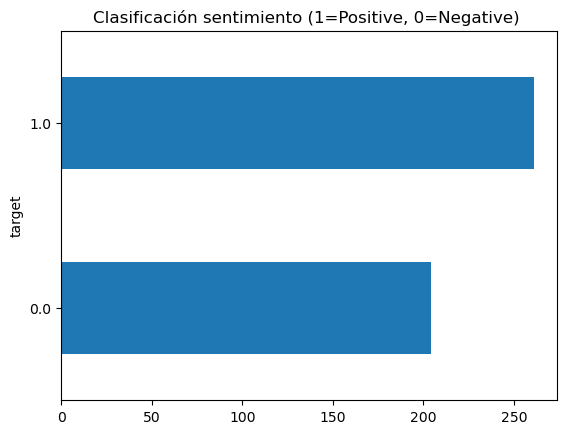

In [445]:
dfreq = dfreq.sort_values(by=['frequency'])
dfreq.frequency.plot(kind='barh', title="Clasificación sentimiento (1=Positive, 0=Negative) ")

In [411]:
# Se seleccionan únicamente las columnas de 'Date' y las del análisis de 
# sentimientos ('Positive', 'Negative' y 'Neutral')

dfgroup = dfgroup[['Date','Positive', 'Negative', 'Neutral']]
dfgroup.head(10)


,Date,Positive,Negative,Neutral
0,2009-12-18,0.809007,0.007936,0.183057
1,2010-03-01,0.789307,0.094099,0.116594
2,2010-08-26,0.784925,0.008581,0.206494
3,2010-12-09,0.107827,0.841045,0.051128
4,2011-03-22,0.887451,0.007878,0.104671
5,2011-06-27,0.632145,0.049713,0.318142
6,2011-07-21,0.009844,0.975370,0.014786
7,2011-07-27,0.104884,0.861250,0.033866
8,2011-09-28,0.008886,0.967153,0.023962
9,2011-10-03,0.569172,0.012276,0.418551


In [412]:
# Se procede a realizar el mapeo con el dictionary del target

dfgroup['target'] = dfgroup['Date'].map(dictionary)
dfgroup.head(10)

,Date,Positive,Negative,Neutral,target
0,2009-12-18,0.809007,0.007936,0.183057,1.0
1,2010-03-01,0.789307,0.094099,0.116594,1.0
2,2010-08-26,0.784925,0.008581,0.206494,1.0
3,2010-12-09,0.107827,0.841045,0.051128,0.0
4,2011-03-22,0.887451,0.007878,0.104671,1.0
5,2011-06-27,0.632145,0.049713,0.318142,1.0
6,2011-07-21,0.009844,0.975370,0.014786,0.0
7,2011-07-27,0.104884,0.861250,0.033866,1.0
8,2011-09-28,0.008886,0.967153,0.023962,0.0
9,2011-10-03,0.569172,0.012276,0.418551,0.0


In [413]:
# Se determina si quedaron valores nulos (fechas de headlines sin la correspondiente 
# referencia del cambio en precios)

dfgroup.isnull().sum()

Date         0
Positive     0
Negative     0
Neutral      0
target      14
dtype: int64

In [414]:
# Se eliminan los registros que quedaron con valores nulos

dfgroup = dfgroup.dropna()
dfgroup.isnull().sum()

Date        0
Positive    0
Negative    0
Neutral     0
target      0
dtype: int64

In [415]:
# Se obtiene finalmente un data frame depurado con la información de la fecha
# las features de la clasificación de análisis de sentimientos y el target
# correspondiente al cambio en el precio de la acción de cada día.

dfgroup.head(10)

,Date,Positive,Negative,Neutral,target
0,2009-12-18,0.809007,0.007936,0.183057,1.0
1,2010-03-01,0.789307,0.094099,0.116594,1.0
2,2010-08-26,0.784925,0.008581,0.206494,1.0
3,2010-12-09,0.107827,0.841045,0.051128,0.0
4,2011-03-22,0.887451,0.007878,0.104671,1.0
5,2011-06-27,0.632145,0.049713,0.318142,1.0
6,2011-07-21,0.009844,0.975370,0.014786,0.0
7,2011-07-27,0.104884,0.861250,0.033866,1.0
8,2011-09-28,0.008886,0.967153,0.023962,0.0
9,2011-10-03,0.569172,0.012276,0.418551,0.0


In [416]:
# Cálculo de la frecuencia de las clases, columna 'target' 

dfreq = (dfgroup
                .groupby('target')
                .agg(frequency=("target", "count")))

dfreq

,frequency
target,
0.0,204
1.0,261


<AxesSubplot:title={'center':'Clasificación cambio en precios (1=Aumento, 0=Disminución) '}, ylabel='target'>

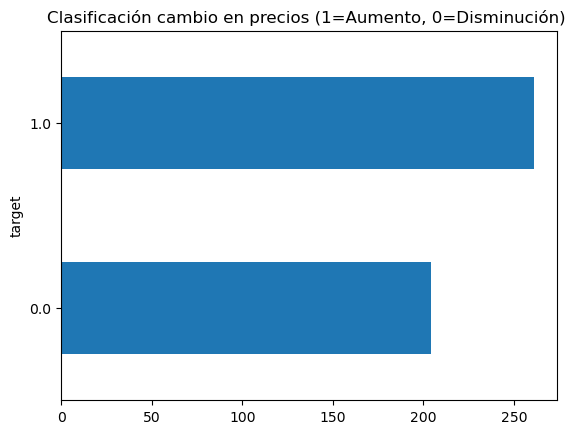

In [447]:
dfreq = dfreq.sort_values(by=['frequency'])
dfreq.frequency.plot(kind='barh', title="Clasificación cambio en precios (1=Aumento, 0=Disminución) ")

### Aplicación de los modelos de predicción

Antes de aplicar los modelos de predicción se procede a balancear los datos 

In [442]:
from sklearn.model_selection import train_test_split

# Selección de las features
features = dfgroup[['Positive', 'Negative','Neutral']]

# Seleccción del target
target = dfgroup[['target']]

# Split del dataset para el training 80% y el test 20%
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=109)

#### Modelo Support Vector Machine

In [438]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics

# Instanciamiento delo clasificador
cls = LinearSVC()


# Entrenamiento del modelo usando el train set
cls.fit(X_train, y_train)

# Predicción de la respuesta con el test set
y_pred = cls.predict(X_test)


Accuracy: 0.61
Detail:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        36
         1.0       0.61      1.00      0.76        57

    accuracy                           0.61        93
   macro avg       0.31      0.50      0.38        93
weighted avg       0.38      0.61      0.47        93



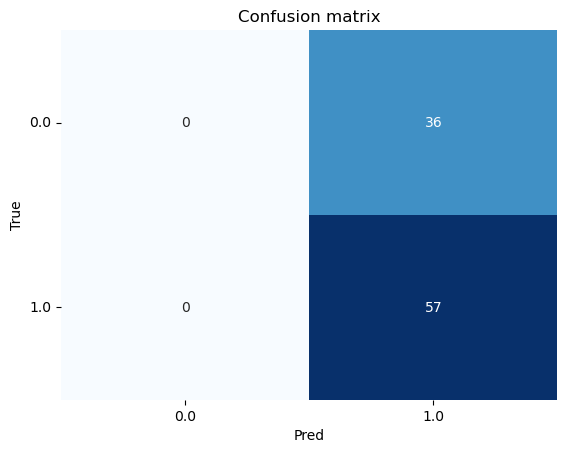

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar el desempeño del modelo

def plot_confusion_matrix(y_test, predicted):
    classes = np.unique(y_test)
    
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)

    print("Accuracy:",  round(accuracy,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    plt.show()
    
plot_confusion_matrix(y_test, y_pred)

#### Modelo Naive Bayes

Accuracy: 0.61
Detail:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        36
         1.0       0.61      1.00      0.76        57

    accuracy                           0.61        93
   macro avg       0.31      0.50      0.38        93
weighted avg       0.38      0.61      0.47        93



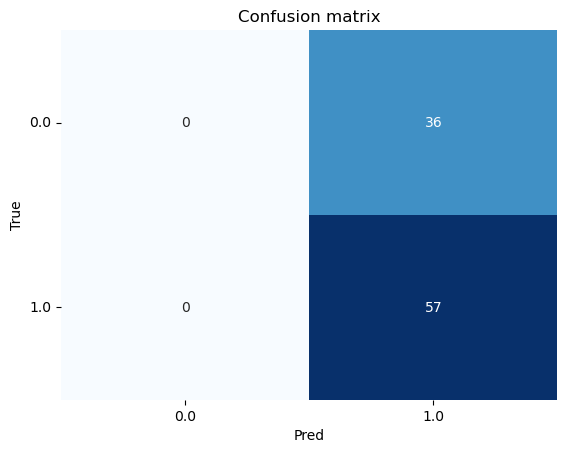

In [440]:
from sklearn.naive_bayes import MultinomialNB

# Instanciamiento delo clasificador
cls = MultinomialNB()

# Entrenamiento del modelo usando el train set
cls.fit(X_train, y_train)

# Predicción de la respuesta con el test set
y_pred = cls.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

#### Modelo Multi-layer Perceptron

Accuracy: 0.66
Detail:
              precision    recall  f1-score   support

         0.0       0.58      0.39      0.47        36
         1.0       0.68      0.82      0.75        57

    accuracy                           0.66        93
   macro avg       0.63      0.61      0.61        93
weighted avg       0.64      0.66      0.64        93



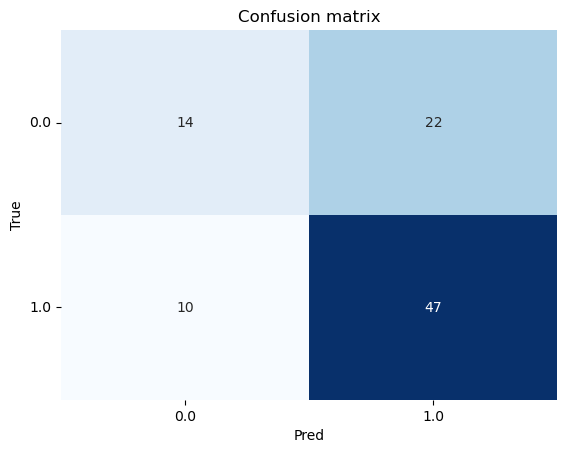

In [441]:
from sklearn.neural_network import MLPClassifier

# Instanciamiento delo clasificador
cls = MLPClassifier(activation='relu', hidden_layer_sizes=(30), max_iter=8)

# Pipeline
#pipe = make_pipeline(MLPClassifier())

# Entrenamiento del modelo usando el train set
cls.fit(X_train, y_train)

# Predicción de la respuesta con el test set
y_pred = cls.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

#### Modelo Randon Forest

Accuracy: 0.65
Detail:
              precision    recall  f1-score   support

         0.0       0.64      0.19      0.30        36
         1.0       0.65      0.93      0.76        57

    accuracy                           0.65        93
   macro avg       0.64      0.56      0.53        93
weighted avg       0.64      0.65      0.58        93



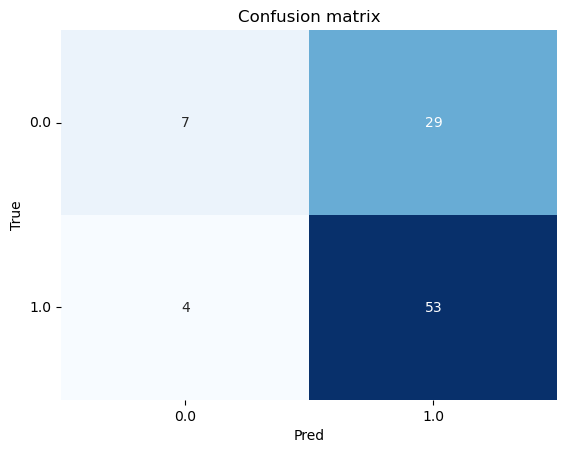

In [435]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamiento delo clasificador
cls = RandomForestClassifier(max_depth=3, n_estimators=400,criterion='gini')

# Entrenamiento del modelo usando el train set
cls.fit(X_train, y_train)

# Predicción de la respuesta con el test set
y_pred = cls.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

#### Conclusiones:

El resumen del resultado de predicción para cada modelo aplicado es el siguiente:

| Modelo | Accuracy |
| -- | -- |
| Support Vector Machine | 0.61 |
| Naive Bayes | 0.61 |
| ML Perceptron | 0.66 |
| Random Forest | 0.65 |

Como puede observarse las evaluaciones de las predicciones no presentan precisiones muy altas pero, en especial para los modelos de Perceptron Multicapa (66%) y Random Forest (65%), equivalen a un margen interesante sobre lo que sería una decisión tomada al azar del 50%, sobre todo considerando la dificultad propia del comportamiento de los mercados y, en el caso particular, la limitación en la cantidad de datos obtenidos en cuanto a encabezados financieros significativos.